In [ ]:
# mandel.py
# working on the mandelbrot tutorial on tensorflow
# https://www.tensorflow.org/tutorials/mandelbrot

# libraries for simulation
import tensorflow as tf
import numpy as np

# for visualization
import PIL.Image
from io import BytesIO
from IPython.display import Image, display

In [ ]:
def DisplayFractal(a, fmt='jpeg'):
	"""Display an array of iteration counts as an image"""
	a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
	img = np.concatenate([10+30*np.cos(a_cyclic),
						  30+50*np.sin(a_cyclic),
						  155-80*np.cos(a_cyclic)],2)
	img[a==a.max()] = 0
	a = img
    # change the color a little bit, looks more noisy
	a = np.uint8(np.clip(255,a,a))
	f=BytesIO()
	PIL.Image.fromarray(a).save(f,fmt)
	display(Image(data=f.getvalue()))

In [ ]:
sess = tf.InteractiveSession()

In [ ]:
# Use NumPy to create a 2D array of complex numbers

Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
Z = X+1j*Y

In [ ]:
# Now we define and initialize TensorFlow tensors.

xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs, tf.float32))

In [ ]:
# TensorFlow requires that you explicitly initialize variables before using them.

tf.global_variables_initializer().run()

In [ ]:
# Defining and Running the Computation

# Now we specify more of the computation...

# Compute the new values of z: z^2 + x
zs_ = zs*zs + xs

# Have we diverged with this new value?
not_diverged = tf.abs(zs_) < 4

# Operation to update the zs and the iteration count.
#
# Note: We keep computing zs after they diverge! This
#       is very wasteful! There are better, if a little
#       less simple, ways to do this.
#
step = tf.group(
  zs.assign(zs_),
  ns.assign_add(tf.cast(not_diverged, tf.float32))
  )

In [12]:
# ... and run it for a couple hundred steps

for i in range(200): step.run()


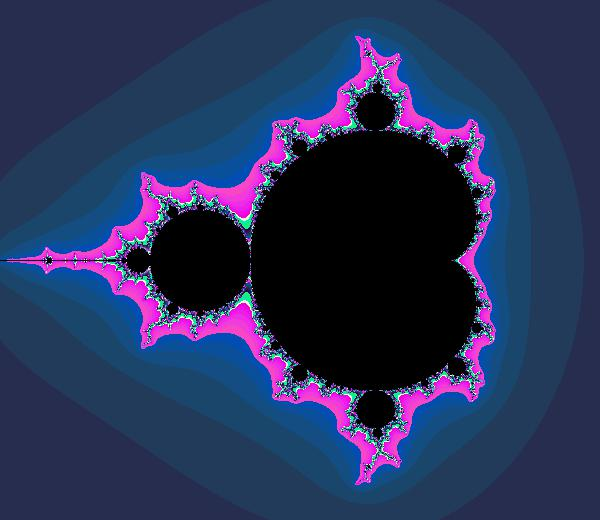

In [13]:
# Let's see what we've got.

DisplayFractal(ns.eval())